In [1]:
#######################################################
#######################################################
##
## This notebook creates two stacked barcharts 
## showing the composition of different repositories 
## being mentioned across 1000+ journals.
##
#######################################################
#######################################################

In [2]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [12]:
# import data
df = pd.read_csv('pmcBasicStats.csv')
df

,journalName,MULTI,NCBI_SRA,EMBL,DDBJ,NCBI_GEO,TCGA,GTEx
0,20_Century_Br_Hist,0,0,0,0,0,0,0
1,3_Biotech,0,5,1,0,0,25,1
2,3D_Print_Med,0,0,0,0,0,1,0
3,A_A_Case_Rep,0,0,0,0,0,0,0
4,A_A_Pract,0,0,0,0,0,0,0
5,AAPS_J,0,0,0,0,1,1,0
6,AAPS_Open,0,0,0,0,0,0,0
7,AAPS_PharmSciTech,0,0,0,0,0,0,0
8,AAS_Open_Res,0,0,0,0,0,0,0
9,Abdom_Imaging,0,0,0,0,0,0,0


In [15]:
# split TCGA and GTEx off from the rest

# SRA etc. in one dataframe...
colsSRA = [ 'journalName', 'MULTI', 'NCBI_SRA', 'EMBL', 'DDBJ', 'NCBI_GEO' ]
dfSRA = pd.DataFrame(df, columns=colsSRA)
totals = dfSRA.sum(axis=1)
dfSRA.insert(1, "Total", totals, True)

# TCGA and GTEx in another one
colsTCGA = [ 'journalName', 'TCGA', 'GTEx' ]
dfTCGA = pd.DataFrame(df, columns=colsTCGA)
totals = dfTCGA.sum(axis=1)
dfTCGA.insert(1, "Total", totals, True)

In [6]:
## CLEAN THE DATA ##
switch = True
for frame in [dfSRA, dfTCGA]:
    # remove all-zero rows
    clean_df = frame[frame.Total != 0]
    sorted_df = clean_df.sort_values(['Total'], ascending=False).reset_index(drop=True)

    # take rows with highest totals
    CUTOFF = 150
    mini_df = sorted_df.iloc[list(range(CUTOFF))]
    ind = list(range(CUTOFF, len(sorted_df)))

    # sum the rest into an "other" column
    otherRow = sorted_df.iloc[ind].sum() 
    otherRow['journalName'] = "Other"

    # add "other" to the dataframe
    mini_df = mini_df.append(otherRow.to_frame().transpose(), ignore_index = True)

    if (switch):
        mini_dfSRA = mini_df
        switch = False
    else:
        mini_dfTCGA = mini_df

In [16]:
# create a new dataframe with percentages instead of counts
dfPctSRA = pd.DataFrame()
dfPctTCGA = pd.DataFrame()
dfPctSRA['journalName'] = mini_df['journalName']
dfPctTCGA['journalName'] = mini_df['journalName']
for i in ['MULTI', 'NCBI_SRA', 'EMBL', 'DDBJ', 'NCBI_GEO']:
    dfPctSRA[i] = mini_dfSRA[i]/mini_dfSRA['Total']
for i in ['TCGA', 'GTEx']:
    dfPctTCGA[i] = mini_dfTCGA[i]/mini_dfTCGA['Total']
        
# rearrange columns
cols = ['journalName', 'NCBI_GEO', 'NCBI_SRA', 'EMBL', 'DDBJ', 'MULTI']
dfPctSRA = dfPctSRA[cols]
cols = ['journalName', 'TCGA', 'GTEx']
dfPctTCGA = dfPctTCGA[cols]

dfPctSRA = dfPctSRA.sort_values(['NCBI_GEO'], ascending=False).reset_index(drop=True)
dfPctTCGA = dfPctTCGA.sort_values(['TCGA'], ascending=False).reset_index(drop=True)

,journalName,NCBI_GEO,NCBI_SRA,EMBL,DDBJ,MULTI
0,Nat_Cell_Biol,1,0,0,0,0
1,Stem_Cells_Int,0.991597,0,0,0,0.00840336
2,Cells,0.920635,0,0,0,0.0793651
3,Int_J_Nanomedicine,0.915888,0.00934579,0,0,0.0747664
4,Oncogene,0.889401,0.0529954,0.00230415,0.00230415,0.0529954
5,Bioinformatics,0.886598,0.0206186,0,0,0.0927835
6,Mol_Vis,0.850622,0.033195,0,0.00414938,0.112033
7,J_Virol,0.847059,0.0588235,0,0,0.0941176
8,Mol_Microbiol,0.84507,0.0140845,0,0,0.140845
9,Int_J_Med_Sci,0.84375,0.015625,0.015625,0,0.125


In [8]:
# set up the dataframe to be graphed
switch = True
for frame in [dfPctSRA, dfPctTCGA]:
    dfT = frame.transpose()
    newHeader = dfT.iloc[0]
    dfT = dfT[1:]
    dfT.columns = newHeader
    if(switch):
        dfT_SRA = dfT
        switch = False
    else:
        dfT_TCGA = dfT

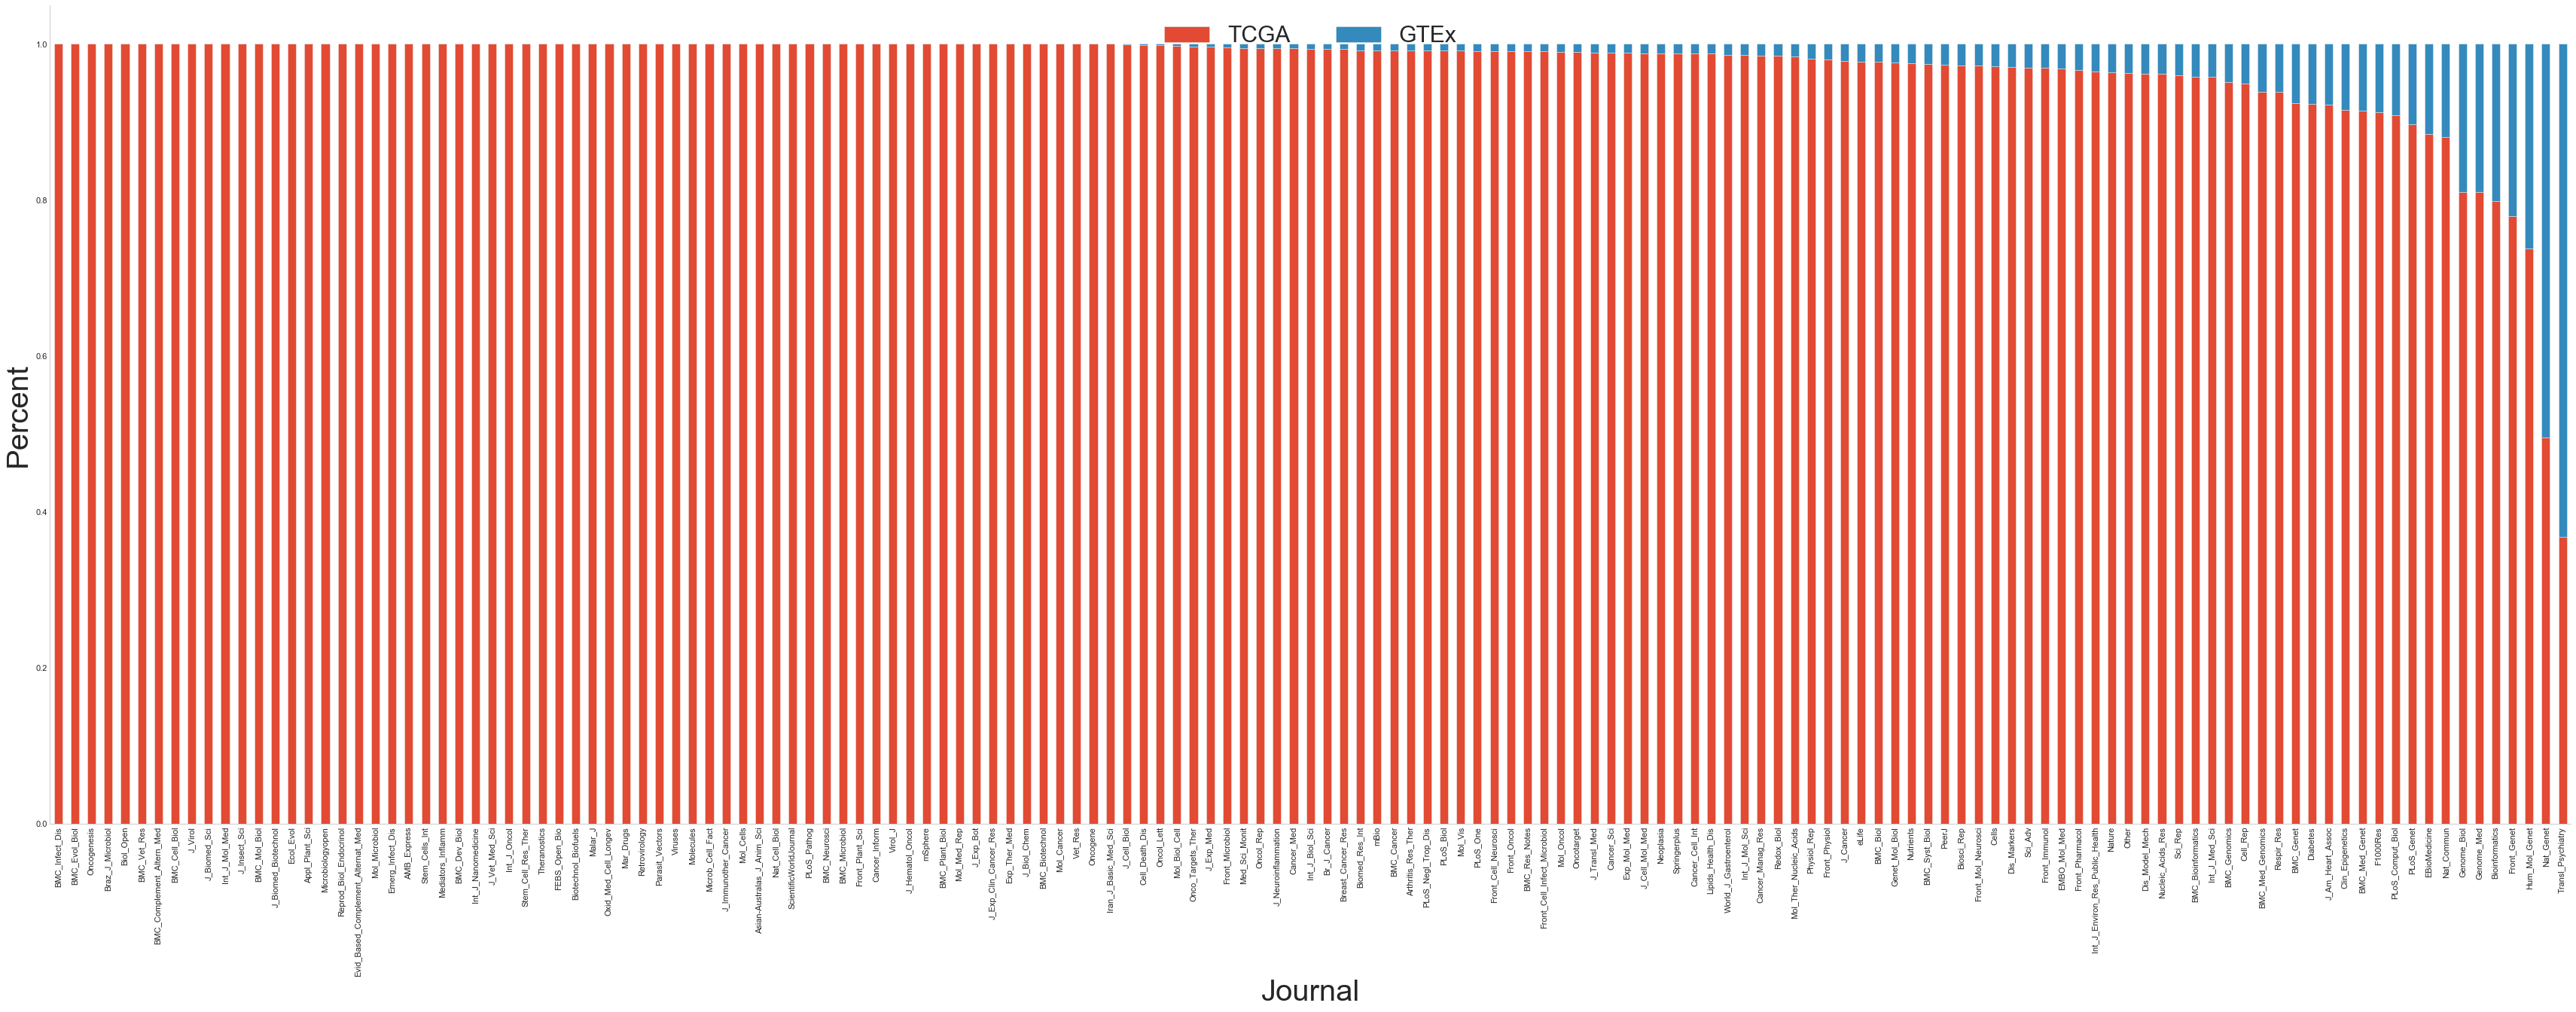

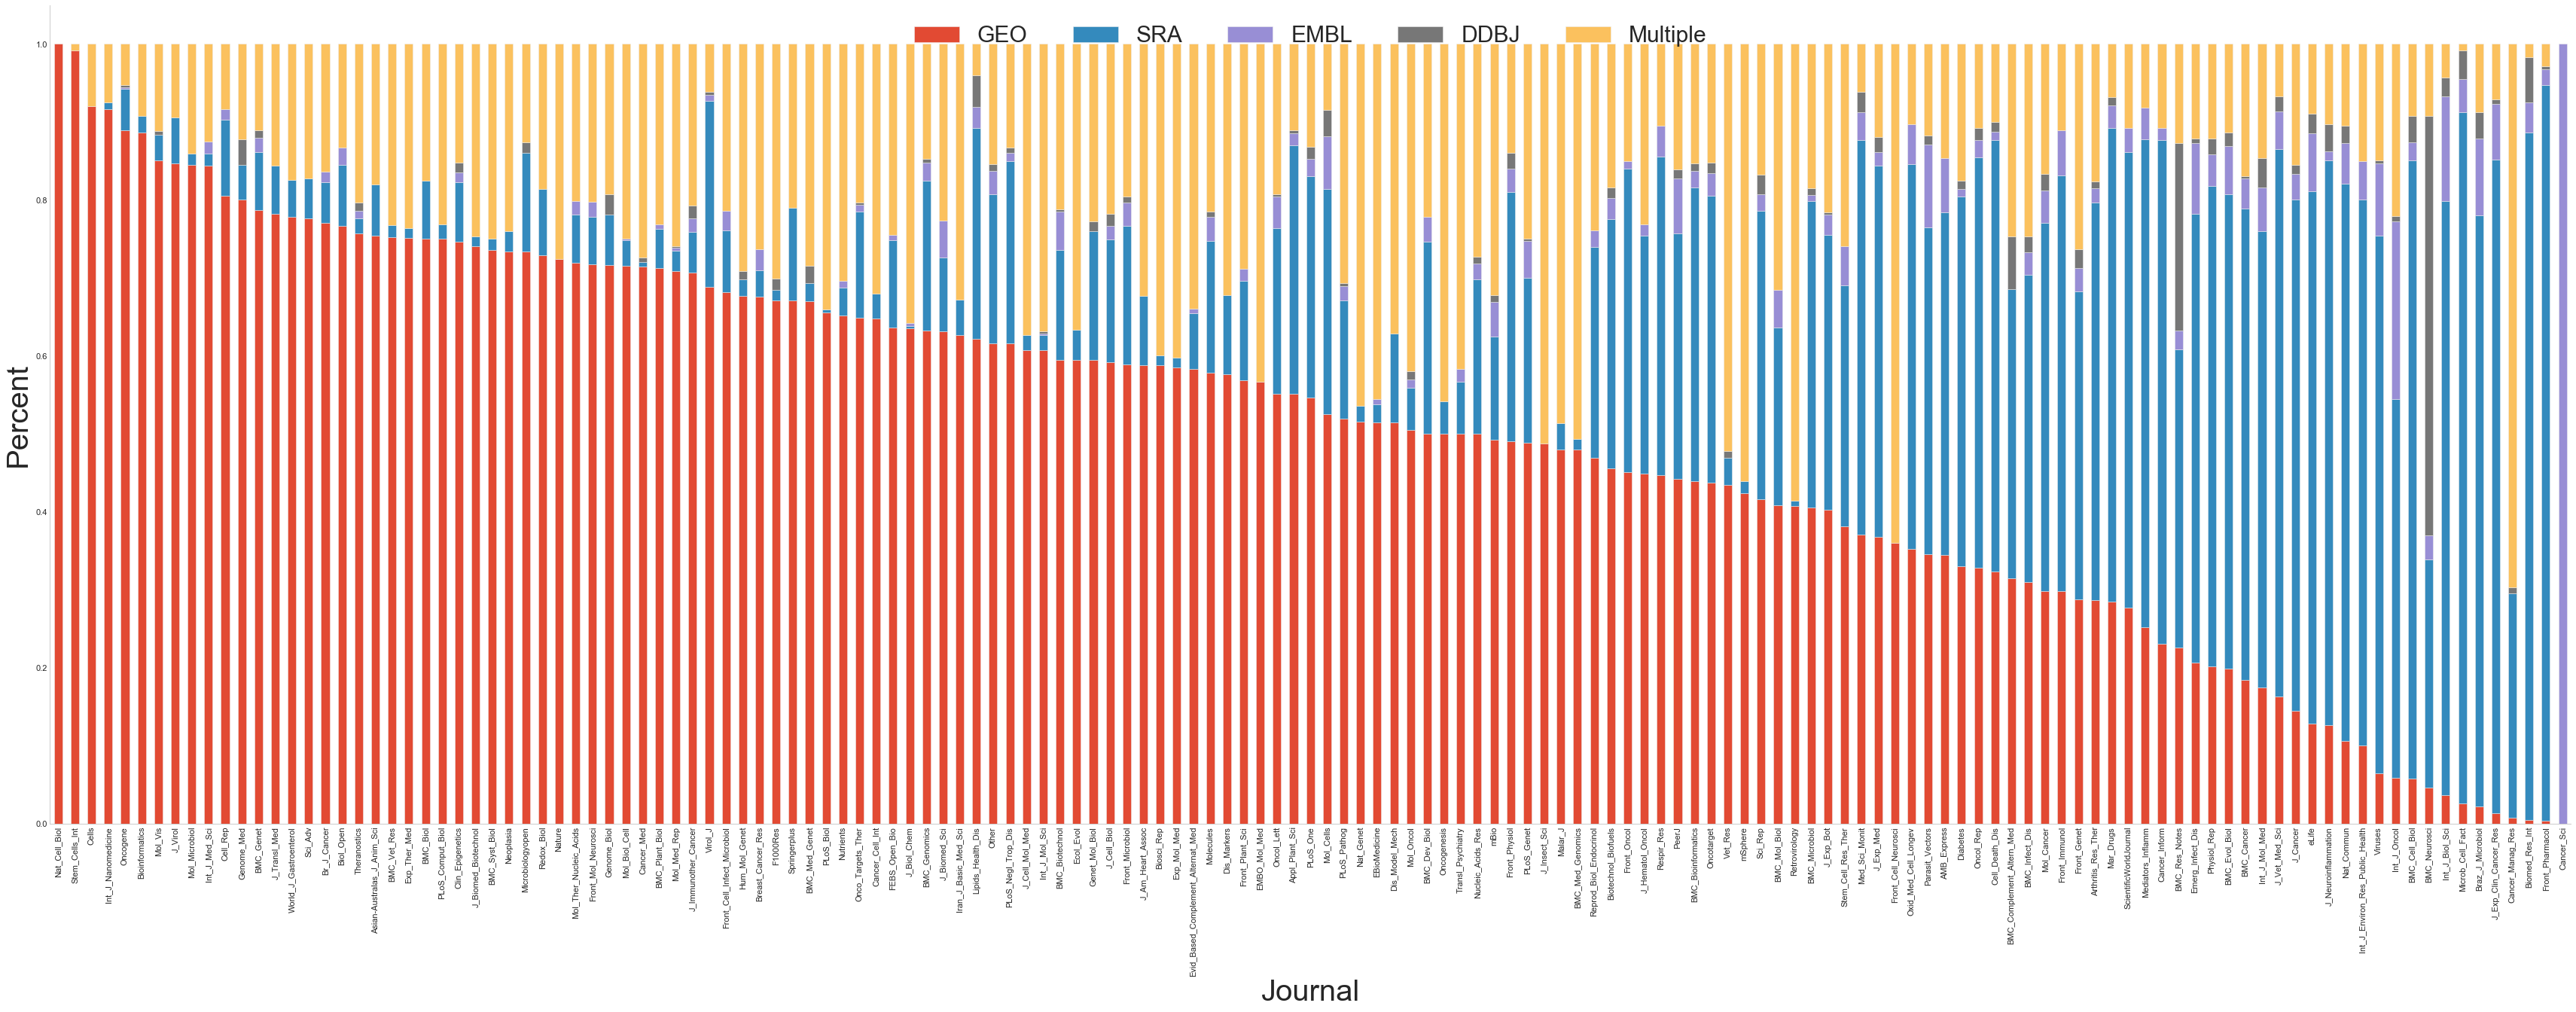

In [34]:
## PLOT TWO STACKED BARCHARTS ##

# make the colors look nice
sns.set(style = 'whitegrid')
plt.style.use(['ggplot', 'seaborn-whitegrid'])

# create axis objects
axTCGA = dfT_TCGA.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()
axSRA = dfT_SRA.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()
axTCGA.grid(False)
axSRA.grid(False)

# create legend objects
axTCGA.legend(loc='upper center', ncol = 2, prop={'size': 30}, labels=['TCGA', 'GTEx'])
axSRA.legend(loc='upper center', ncol = 5, prop={'size': 30}, labels=['GEO', 'SRA', 'EMBL', 'DDBJ', 'Multiple'])

# fix labels
axSRA.set_xlabel("Journal", fontsize=40)
axSRA.set_ylabel("Percent", fontsize=40)
axTCGA.set_xlabel("Journal", fontsize=40)
axTCGA.set_ylabel("Percent", fontsize=40)

# create figure objects
graphTCGA = axTCGA.get_figure()
graphSRA = axSRA.get_figure()

# write to .png files
graphTCGA.savefig('repo_composition_TCGA.png', dpi = 200, bbox_inches = 'tight', transparent = True)
graphSRA.savefig('repo_composition_SRA.png', dpi = 200, bbox_inches = 'tight', transparent = True)

In [19]:
#plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']